In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
#import japanize_matplotlib
import datetime
from matplotlib.dates import MonthLocator
from IPython.display import HTML

sns.set_style('darkgrid')
pio.templates.default = 'seaborn'
plt.rcParams['font.family'] = 'IPAexGothic'

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import matplotlib
import plotly
print(matplotlib.__version__) # 3.1.1
print(sns.__version__) # 0.9.0
print(plotly.__version__) # 4.2.1

3.3.2
0.11.0
4.8.2


In [21]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
%matplotlib inline


In [23]:
# iris datasetを使います
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\wythe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
C:\Users\wythe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12364 missing from current font.

C:\Users\wythe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12367 missing from current font.

C:\Users\wythe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 12398 missing from current font.

C:\Users\wythe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 38263 missing from current font.

C:\Users\wythe\Anaconda3\lib\site-package

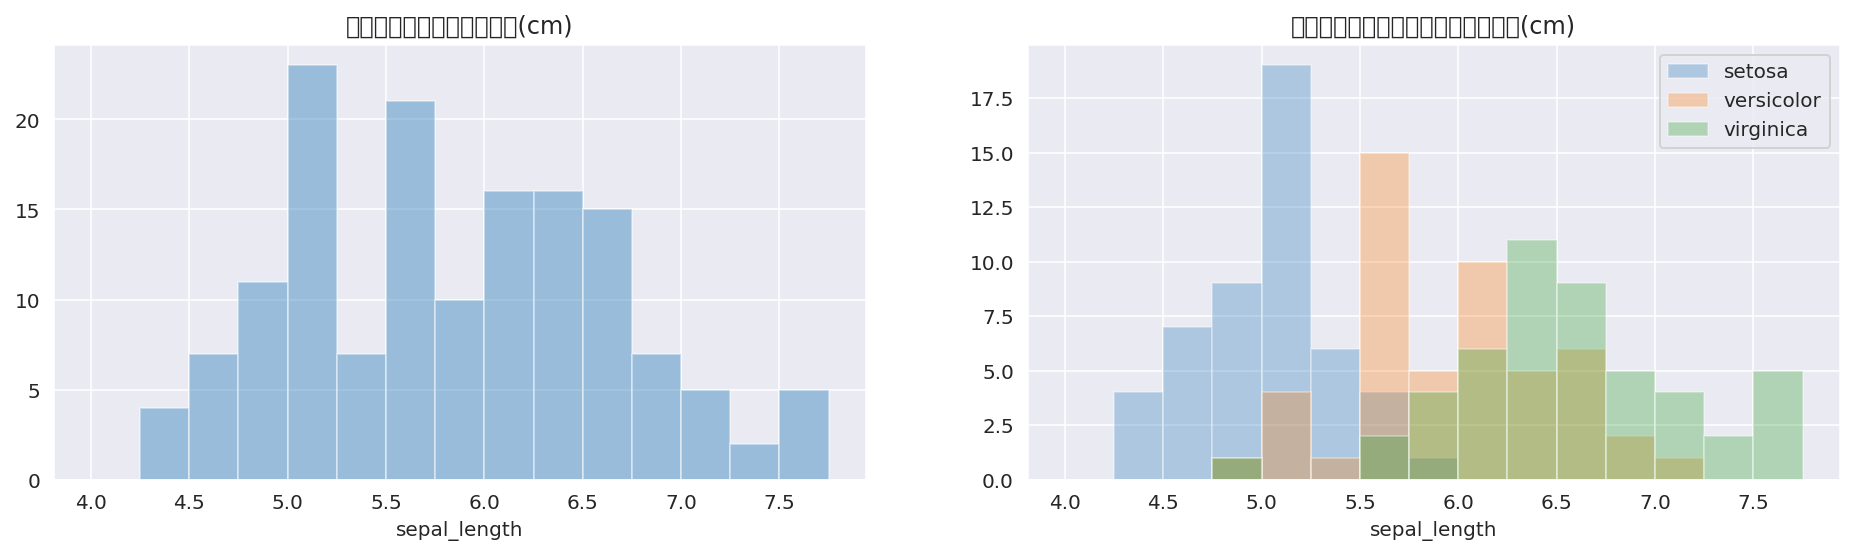

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
sns.distplot(iris['sepal_length'], bins=np.arange(4,8,0.25), kde=False, label='all', ax=axes[0])
sns.distplot(iris.query('species=="setosa"')['sepal_length'], kde=False,
             bins=np.arange(4,8,0.25), label='setosa', hist_kws={'alpha':0.3}, ax=axes[1])
sns.distplot(iris.query('species=="versicolor"')['sepal_length'], kde=False,
             bins=np.arange(4,8,0.25), label='versicolor', hist_kws={'alpha':0.3}, ax=axes[1])
sns.distplot(iris.query('species=="virginica"')['sepal_length'], kde=False,
             bins=np.arange(4,8,0.25), label='virginica', hist_kws={'alpha':0.3}, ax=axes[1])
axes[0].set_title("がくの長さのヒストグラム(cm)")
axes[1].set_title("品種毎のがくの長さのヒストグラム(cm)")
axes[1].legend()
plt.show()

In [57]:
# binの幅を明示的に指定できないが、nbinsの大きさを変えるとよしなにいい感じの幅にしてくれる
# plotly expressはfigを生成する
# subplotsの中に図を格納したい場合は、各々のfig.dataの中からtraceを取り出して格納できる
# が、marginalを指定した場合marginalの位置が崩れるので一旦放置
fig = px.histogram(iris, x='sepal_length', color='species', 
                           nbins=19, range_x=[4,8], width=600, height=350,
                           opacity=0.4, marginal='box')
# histogram描画時にrange_yを指定すると、marginalのboxplotの描画位置が崩れる
fig.update_layout(barmode='overlay')
fig.update_yaxes(range=[0,20],row=1, col=1)
# htmlで保存
fig.write_html('histogram_with_boxplot.html', auto_open=False)
fig.show()

In [58]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('がく片の長さ(cm)', '品種毎のがく片の長さ(cm)'))
fig.add_trace(go.Histogram(x=iris['sepal_length'], xbins=dict(start=4,end=8,size=0.25), hovertemplate="%{x}cm: %{y}個", name="全品種"), row=1, col=1)
for species in ['setosa', 'versicolor', 'virginica']:
    fig.add_trace(go.Histogram(x=iris.query(f'species=="{species}"')['sepal_length'],
                           xbins=dict(start=4,end=8,size=0.25), hovertemplate="%{x}cm: %{y}個", name=species), row=1, col=2)
fig.update_layout(barmode='overlay', height=400, width=900)
fig.update_traces(opacity=0.3, row=1, col=2)
fig.update_xaxes(tickvals=np.arange(4,8,0.5), title_text='sepal_length')
fig.update_yaxes(title_text='度数')
fig.write_html('histogram_with_boxplot_plotly.html', auto_open=False)
fig.show()

In [59]:
# PlotlyはSeabornと違ってよしなに長さの平均や標準偏差を計算してくれない
agg_iris = iris.groupby(['species'])[['sepal_length']].agg([np.mean, np.std, 'count']).reset_index()
agg_iris.columns = ['species', 'sepal_length', 'std', 'count']
fig = px.bar(agg_iris, x='sepal_length', y='species', color='species', category_orders={'species': ['setosa', 'versicolor', 'virginica']}, 
       error_x='std', orientation='h', hover_data=['count'], height=300, width=600, title='品種毎のがく片の平均の長さ(cm)')
fig.update_layout(showlegend=False)
fig.write_html('barplot_px.html', auto_open=False)
fig.show()

In [60]:
tips = px.data.tips()
fig = px.histogram(tips, x="sex", y="tip", histfunc="avg", color="smoker", barmode="group",
             facet_row="time", facet_col="day", category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                                                                "time": ["Lunch", "Dinner"]},
                  height=400, width=800)
fig.write_html('Starbucks/boxplot_with_facet_px.html', auto_open=False)
fig.show()

In [62]:
iris['sepal_length_rank'] = pd.cut(iris['sepal_length'], [4,5,7,8], labels=['short', 'medium', 'long'])
agg_iris = iris.groupby(['sepal_length_rank','species']).size().reset_index()
agg_iris.columns = ['sepal_length_rank', 'species', 'count']
pivot_iris = agg_iris.pivot(index='sepal_length_rank', columns='species', values='count')

In [63]:
fig = px.bar(agg_iris, y='sepal_length_rank', x='count', color='species', orientation='h', barmode='relative',
      height=300, width=600, title='がく片の長さのランク毎の度数と品種内訳')
fig.update_xaxes(title_text='度数')
fig.update_yaxes(title_text='がく片の長さのランク')
fig.write_html('Starbucks/stacked_barplot_px.html', auto_open=False)
fig

In [64]:
fig = px.scatter(px.data.iris(), x='sepal_length', y='petal_length', color='species', symbol='species', 
                 marginal_x='box', marginal_y='histogram', trendline='ols',
           hover_data=['species_id'], width=800, height=600, title='がく片の長さと花弁の長さの散布図(cm)')
# rangeはscatterの中ではなく個別に指定しないと、marginalな図にも反映されてmarginalな図が見えなくなる
fig.update_xaxes(title_text='がく片の長さ(cm)', range=[4,8], row=1, col=1)
fig.update_yaxes(title_text='花弁の長さ(cm)', range=[0.5,8], row=1, col=1)
fig.write_html('Starbucks/scatterplot_px.html', auto_open=False)
fig.show()

In [65]:
fig = px.scatter_matrix(iris, dimensions=['sepal_length','sepal_width','petal_length','petal_width'],
                 color='species', size_max=1, title='品種毎の散布図行列', width=800,height=600)
fig.write_html('Starbucks/scattermatrix_px.html', auto_open=False)
fig

In [38]:
flights = sns.load_dataset("flights")
# クロス集計
crossed_flights = pd.pivot_table(flights, values="passengers", index="month", columns="year", aggfunc=np.mean)  
# pd.crosstab(flights["month"], flights["year"], values=flights["passengers"], aggfunc=np.mean)でも可

In [52]:
crossed_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [42]:
fig = go.Figure()
fig.add_trace(go.Heatmap(z=crossed_flights, x=crossed_flights.columns, y=crossed_flights.index,
                        hovertemplate='%{x}-%{y}: %{z} passengers', colorscale='Oranges'))
fig.update_layout(height=400, width=600, title_text='乗客数のヒートマップ(ホバーありアノテートなし)')
#fig.write_html('../output/heatmap_px.html', auto_open=False)
fig.show()

In [55]:
# datetime型の列を準備
datetimes = []

for i, j in enumerate(flights.itertuples()):
    datetimes.append(datetime.datetime.strptime(f'{j[1]}-{j[2]}','%Y-%m'))

flights['datetime'] = datetimes

ValueError: time data '1949-Jan' does not match format '%Y-%m'

In [56]:
fig = px.line(flights, x='datetime', y='passengers', 
              height=400, width=800, title='乗客数の推移の折れ線グラフ(月別)')
fig.update_layout(xaxis_range=['1949-01-01', '1961-01-01'], # datetime.datetimeで指定してもよい
                 xaxis_rangeslider_visible=True)
fig.update_xaxes(tickformat='%Y-%m', tickangle=45)
#fig.write_html('../output/lineplot_px.html', auto_open=False)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['year', 'month', 'passengers'] but received: datetime

In [18]:
df = pd.read_csv(r'C:/Users/wythe/Starbucks/customers.csv')
df

,person,age,gender,loyalty,income,amount,event
0,0009655768c64bdeb2e877511632db8f,33.0,M,461.0,72000.0,127.60,8
1,0011e0d4e6b944f998e987f904e8c1e5,40.0,O,198.0,57000.0,79.46,5
2,0020c2b971eb4e9188eac86d93036a77,59.0,F,874.0,90000.0,196.86,8
3,0020ccbbb6d84e358d3414a3ff76cffd,24.0,F,622.0,60000.0,154.05,12
4,003d66b6608740288d6cc97a6903f4f0,26.0,F,400.0,73000.0,48.34,18


In [7]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()